In [3]:
import os
import numpy  as np 
import warnings
warnings.filterwarnings("ignore")

import random
from random import seed
from PIL import Image
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_directory = r'C:\Users\Jerome\DataScience\AOL_AI\archive\DATASET\TRAIN'
test_directory = r'C:\Users\Jerome\DataScience\AOL_AI\archive\DATASET\TEST'

In [ ]:
train_data_generator = ImageDataGenerator( 
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    horizontal_flip=True
)

validation_data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
)

test_data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [6]:
train_generator = train_data_generator.flow_from_directory(
    train_directory,
    target_size=(150,150),
    class_mode='binary',
    batch_size=128,
    shuffle = True,
    subset="training",
    seed = 43
)

Found 18052 images belonging to 2 classes.


In [7]:
validation_generator = validation_data_generator.flow_from_directory(
    train_directory,
    target_size=(150,150),
    class_mode='binary',
    batch_size=128,
    shuffle = True,
    subset="validation",
    seed = 43
)

Found 4512 images belonging to 2 classes.


In [8]:
test_generator = test_data_generator.flow_from_directory(
    test_directory,
    target_size=(150,150),
    class_mode='binary',
    batch_size=128,
    shuffle = True
)

Found 2537 images belonging to 4 classes.


In [ ]:
core = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
core.trainable = False

model = Sequential([
    core,
    Flatten(),
    Dense(100, activation="relu"),
    Dropout(0.2),
    Dense(50, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])


model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=["accuracy"])

earlystopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

checkpoint_path = "model_checkpoint.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

history = model.fit(train_generator, epochs=2, validation_data=validation_generator, callbacks=[earlystopping, checkpoint])

Epoch 1/2
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8172 - loss: 0.9853
Epoch 1: val_accuracy improved from -inf to 0.91622, saving model to model_checkpoint.keras
142/142 ━━━━━━━━━━━━━━━━━━━━ 956s 7s/step - accuracy: 0.8174 - loss: 0.9827 - val_accuracy: 0.9162 - val_loss: 0.2420
Epoch 2/2
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8881 - loss: 0.3141
Epoch 2: val_accuracy improved from 0.91622 to 0.91711, saving model to model_checkpoint.keras
142/142 ━━━━━━━━━━━━━━━━━━━━ 919s 6s/step - accuracy: 0.8882 - loss: 0.3139 - val_accuracy: 0.9171 - val_loss: 0.2449


In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history, metrics=['loss', 'accuracy'], figsize=(12, 5)):

    num_metrics = len(metrics)
    plt.figure(figsize=figsize)
    
    for i, metric in enumerate(metrics, 1):
        plt.subplot(1, num_metrics, i)
        plt.plot(history.epoch, history.history[metric], label='Training ' + metric)
        plt.plot(history.epoch, history.history['val_' + metric], label='Validation ' + metric)
        plt.title('Training and Validation ' + metric.capitalize())
        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history, metrics=['loss', 'accuracy'], figsize=(16, 6))


NameError: name 'history' is not defined

In [9]:
evaluation = model.evaluate(test_generator)
print(f'test Loss: {evaluation[0]:.4f}')
print(f'test Accuracy: {evaluation[1] * 100:.2f}%')

20/20 ━━━━━━━━━━━━━━━━━━━━ 215s 11s/step - accuracy: 0.8693 - loss: 0.3912
test Loss: 0.3629
test Accuracy: 87.50%


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

img_path = r'C:\Users\Jerome\DataScience\AOL_AI\archive\DATASET\TEST\R\R_10024.jpg'

img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

pred = model.predict(img_array)[0][0]
label = "Anorganic" if pred > 0.5 else "Organic"

print(f"Hasil Prediksi: {label} ({pred:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
Hasil Prediksi: Anorganik (0.96)


In [ ]:

img_path = r'C:\Users\Jerome\DataScience\AOL_AI\archive\DATASET\TEST\test20.jpg'

img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

pred = model.predict(img_array)[0][0]
label = "Anorganic" if pred > 0.5 else "Organic"

print(f"Prediction result: {label} ({pred:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Hasil Prediksi: Organik (0.00)


In [9]:
import os
import cv2
import numpy as np
from skimage.feature import hog

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
def extract_features(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150,150))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    features = hog(
        gray,
        orientations=9,
        pixels_per_cell=(16,16),   
        cells_per_block=(2,2),
        block_norm='L2-Hys'
    )
    return features


In [11]:
def load_dataset(directory):
    X, y = [], []

    class_map = {'O': 0, 'R': 1}  # O=Organik, R=Anorganik

    for label_name, label in class_map.items():
        folder = os.path.join(directory, label_name)

        for file in os.listdir(folder):
            img_path = os.path.join(folder, file)
            features = extract_features(img_path)

            X.append(features)
            y.append(label)

    return np.array(X), np.array(y)


In [12]:
train_dir = r'C:\Users\Jerome\DataScience\AOL_AI\archive\DATASET\TRAIN'
test_dir  = r'C:\Users\Jerome\DataScience\AOL_AI\archive\DATASET\TEST'

X_train, y_train = load_dataset(train_dir)
X_test, y_test   = load_dataset(test_dir)


In [13]:
nb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=100)),
    ('nb', GaussianNB(priors=[0.5, 0.5]))  #cegah bias
])


In [14]:
nb_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=100)),
                ('nb', GaussianNB(priors=[0.5, 0.5]))])

Accuracy: 0.7624353362514923

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      1401
           1       0.73      0.74      0.73      1112

    accuracy                           0.76      2513
   macro avg       0.76      0.76      0.76      2513
weighted avg       0.76      0.76      0.76      2513


Confusion Matrix:
 [[1098  303]
 [ 294  818]]


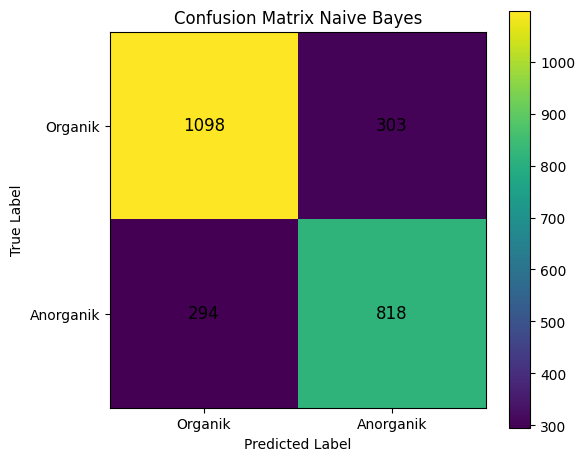

In [ ]:
y_pred = nb_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
labels = ["Organic", "Anorganic"]

# Plot
plt.figure(figsize=(6,5))
plt.imshow(cm)
plt.title("Confusion Matrix Naive Bayes")
plt.colorbar()

plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)

for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center", fontsize=12)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()



In [ ]:
def predict_single_image(image_path, model):
    features = extract_features(image_path)
    features = features.reshape(1, -1)

    pred = model.predict(features)[0]
    prob = model.predict_proba(features)[0]

    label = "Organic" if pred == 0 else "Anorganic"
    return label, prob


In [ ]:
img_path = r'C:\Users\Jerome\DataScience\AOL_AI\archive\DATASET\TEST\test2.jpg'

label, prob = predict_single_image(img_path, nb_pipeline)

print("Prediction:", label)
print("Probability [Organic, Anorganic]:", prob)


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:

img_path = r'C:\Users\Jerome\DataScience\AOL_AI\archive\DATASET\TEST\test3.jpeg'

img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

pred = model.predict(img_array)[0][0]
label = "Anorganic" if pred > 0.5 else "Organic"

print(f"Prediction result: {label} ({pred:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Hasil Prediksi: Organik (0.00)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Hasil CNN
Hasil Prediksi: Organik
Organik    : 95.63%
Anorganik  : 4.37%


Hasil Naive Bayes
Prediksi: Anorganik
Probabilitas [Organik, Anorganik]: [4.57952095e-05 9.99954205e-01]


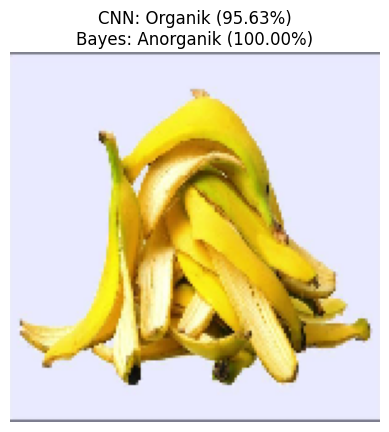

In [ ]:
img_path = r'C:\Users\Jerome\DataScience\AOL_AI\archive\DATASET\TEST\test4.jpg'

img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

pred = model.predict(img_array)[0][0]
confidence_anorganik = pred * 100
confidence_organik = (1 - pred) * 100

if pred > 0.5:
    label = "Anorganic"
else:
    label = "Organic"

print("CNN")
print(f"Prediction: {label}")
print(f"Organic    : {confidence_organik:.2f}%")
print(f"Anorganic  : {confidence_anorganik:.2f}%")


nb_label, nb_prob = predict_single_image(img_path, nb_pipeline)
print("\n")
print("Naive Bayes")
print("Prediction:", nb_label)
print("Probability [Organic, Anorganic]:", nb_prob)

plt.imshow(img)
plt.axis("off")
if pred > 0.5:
    cnn_text = f"CNN: {label} ({confidence_anorganik:.2f}%)\n"
else:
    cnn_text = f"CNN: {label} ({confidence_organik:.2f}%)\n"

bayes_text = f"Bayes: {nb_label} ({max(nb_prob)*100:.2f}%)"

plt.title(cnn_text + bayes_text)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
Hasil CNN
Hasil Prediksi: Anorganik
Organik    : 0.19%
Anorganik  : 99.81%


Hasil Naive Bayes
Prediksi: Anorganik
Probabilitas [Organik, Anorganik]: [0.11682842 0.88317158]


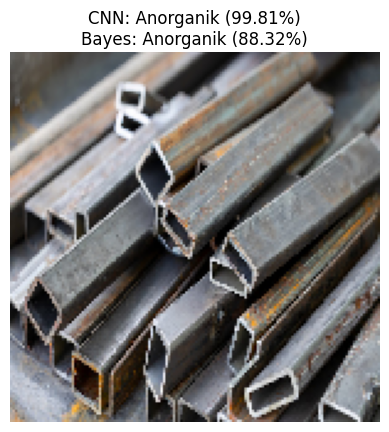

In [ ]:
img_path = r'C:\Users\Jerome\DataScience\AOL_AI\archive\DATASET\TEST\test7.jpg'

img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

pred = model.predict(img_array)[0][0]
confidence_anorganik = pred * 100
confidence_organik = (1 - pred) * 100

if pred > 0.5:
    label = "Anorganic"
else:
    label = "Organic"

print("CNN")
print(f"Prediction: {label}")
print(f"Organic    : {confidence_organik:.2f}%")
print(f"Anorganic  : {confidence_anorganik:.2f}%")


nb_label, nb_prob = predict_single_image(img_path, nb_pipeline)
print("\n")
print("Naive Bayes")
print("Prediction:", nb_label)
print("Probability [Organic, Anorganic]:", nb_prob)

plt.imshow(img)
plt.axis("off")
if pred > 0.5:
    cnn_text = f"CNN: {label} ({confidence_anorganik:.2f}%)\n"
else:
    cnn_text = f"CNN: {label} ({confidence_organik:.2f}%)\n"

bayes_text = f"Bayes: {nb_label} ({max(nb_prob)*100:.2f}%)"

plt.title(cnn_text + bayes_text)

plt.show()

In [57]:
# Simpan model CNN
model.save("cnn_waste_classifier.keras")


In [1]:
from tensorflow.keras.models import load_model

model = load_model("cnn_waste_classifier.keras")
print("Model CNN berhasil dimuat")


Model CNN berhasil dimuat


In [2]:
import joblib

joblib.dump(nb_model, "nb_waste_model.pkl")


NameError: name 'nb_model' is not defined

In [2]:
import joblib

nb_model = joblib.load("nb_waste_model.pkl")
print("Model Naive Bayes berhasil dimuat")


Model Naive Bayes berhasil dimuat


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Hasil CNN
Hasil Prediksi: Anorganik
Organik    : 0.06%
Anorganik  : 99.94%


Hasil Naive Bayes
Prediksi: Organik
Probabilitas [Organik, Anorganik]: [0.98525546 0.01474454]


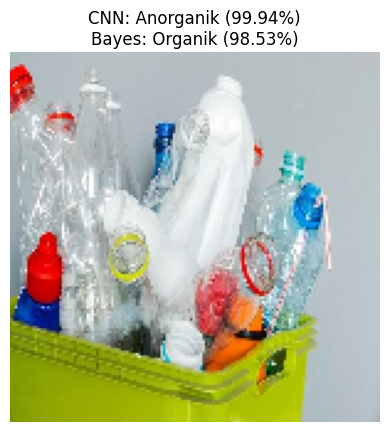

In [ ]:
img_path = r'C:\Users\Jerome\DataScience\AOL_AI\archive\DATASET\TEST\test1.jpg'

img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

pred = model.predict(img_array)[0][0]
confidence_anorganik = pred * 100
confidence_organik = (1 - pred) * 100

if pred > 0.5:
    label = "Anorganic"
else:
    label = "Organic"

print("CNN")
print(f"Prediction: {label}")
print(f"Organic    : {confidence_organik:.2f}%")
print(f"Anorganic  : {confidence_anorganik:.2f}%")


nb_label, nb_prob = predict_single_image(img_path, nb_pipeline)
print("\n")
print("Naive Bayes")
print("Prediction:", nb_label)
print("Probability [Organic, Anorganic]:", nb_prob)

plt.imshow(img)
plt.axis("off")
if pred > 0.5:
    cnn_text = f"CNN: {label} ({confidence_anorganik:.2f}%)\n"
else:
    cnn_text = f"CNN: {label} ({confidence_organik:.2f}%)\n"

bayes_text = f"Bayes: {nb_label} ({max(nb_prob)*100:.2f}%)"

plt.title(cnn_text + bayes_text)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Hasil CNN
Hasil Prediksi: Organik
Organik    : 98.97%
Anorganik  : 1.03%


Hasil Naive Bayes
Prediksi: Organik
Probabilitas [Organik, Anorganik]: [9.99996366e-01 3.63391118e-06]


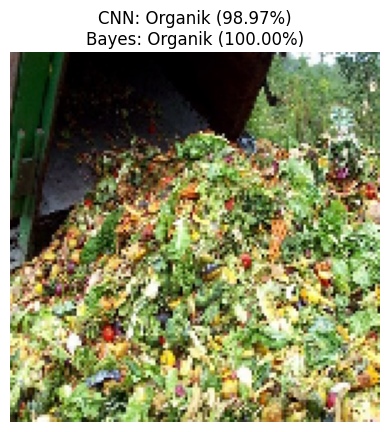

In [22]:
img_path = r'C:\Users\Jerome\DataScience\AOL_AI\archive\DATASET\TEST\test8.jpg'

img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

pred = model.predict(img_array)[0][0]
confidence_anorganik = pred * 100
confidence_organik = (1 - pred) * 100

if pred > 0.5:
    label = "Anorganik"
else:
    label = "Organik"

print("Hasil CNN")
print(f"Hasil Prediksi: {label}")
print(f"Organik    : {confidence_organik:.2f}%")
print(f"Anorganik  : {confidence_anorganik:.2f}%")


nb_label, nb_prob = predict_single_image(img_path, nb_pipeline)
print("\n")
print("Hasil Naive Bayes")
print("Prediksi:", nb_label)
print("Probabilitas [Organik, Anorganik]:", nb_prob)

plt.imshow(img)
plt.axis("off")
if pred > 0.5:
    cnn_text = f"CNN: {label} ({confidence_anorganik:.2f}%)\n"
else:
    cnn_text = f"CNN: {label} ({confidence_organik:.2f}%)\n"

bayes_text = f"Bayes: {nb_label} ({max(nb_prob)*100:.2f}%)"

plt.title(cnn_text + bayes_text)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Hasil CNN
Hasil Prediksi: Organik
Organik    : 54.97%
Anorganik  : 45.03%


Hasil Naive Bayes
Prediksi: Anorganik
Probabilitas [Organik, Anorganik]: [0.07719929 0.92280071]


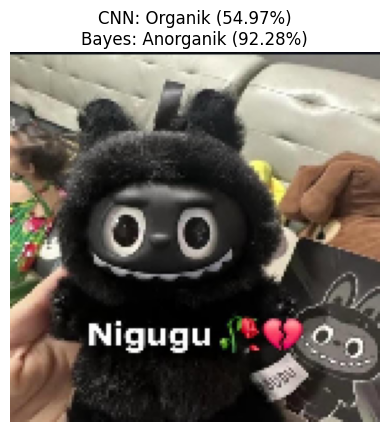

In [24]:
img_path = r'C:\Users\Jerome\DataScience\AOL_AI\archive\DATASET\TEST\test9.jpg'

img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

pred = model.predict(img_array)[0][0]
confidence_anorganik = pred * 100
confidence_organik = (1 - pred) * 100

if pred > 0.5:
    label = "Anorganik"
else:
    label = "Organik"

print("Hasil CNN")
print(f"Hasil Prediksi: {label}")
print(f"Organik    : {confidence_organik:.2f}%")
print(f"Anorganik  : {confidence_anorganik:.2f}%")


nb_label, nb_prob = predict_single_image(img_path, nb_pipeline)
print("\n")
print("Hasil Naive Bayes")
print("Prediksi:", nb_label)
print("Probabilitas [Organik, Anorganik]:", nb_prob)

plt.imshow(img)
plt.axis("off")
if pred > 0.5:
    cnn_text = f"CNN: {label} ({confidence_anorganik:.2f}%)\n"
else:
    cnn_text = f"CNN: {label} ({confidence_organik:.2f}%)\n"

bayes_text = f"Bayes: {nb_label} ({max(nb_prob)*100:.2f}%)"

plt.title(cnn_text + bayes_text)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Hasil CNN
Hasil Prediksi: Anorganik
Organik    : 0.00%
Anorganik  : 100.00%


Hasil Naive Bayes
Prediksi: Anorganik
Probabilitas [Organik, Anorganik]: [0.03479236 0.96520764]


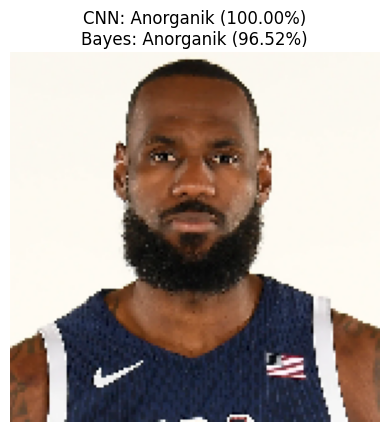

In [27]:
img_path = r'C:\Users\Jerome\DataScience\AOL_AI\archive\DATASET\TEST\test11.webp'

img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

pred = model.predict(img_array)[0][0]
confidence_anorganik = pred * 100
confidence_organik = (1 - pred) * 100

if pred > 0.5:
    label = "Anorganik"
else:
    label = "Organik"

print("Hasil CNN")
print(f"Hasil Prediksi: {label}")
print(f"Organik    : {confidence_organik:.2f}%")
print(f"Anorganik  : {confidence_anorganik:.2f}%")


nb_label, nb_prob = predict_single_image(img_path, nb_pipeline)
print("\n")
print("Hasil Naive Bayes")
print("Prediksi:", nb_label)
print("Probabilitas [Organik, Anorganik]:", nb_prob)

plt.imshow(img)
plt.axis("off")
if pred > 0.5:
    cnn_text = f"CNN: {label} ({confidence_anorganik:.2f}%)\n"
else:
    cnn_text = f"CNN: {label} ({confidence_organik:.2f}%)\n"

bayes_text = f"Bayes: {nb_label} ({max(nb_prob)*100:.2f}%)"

plt.title(cnn_text + bayes_text)

plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 93s 5s/step
Confusion Matrix:
 [[907 494]
 [706 406]]

Classification Report:

              precision    recall  f1-score   support

     Organik       0.56      0.65      0.60      1401
   Anorganik       0.45      0.37      0.40      1112

    accuracy                           0.52      2513
   macro avg       0.51      0.51      0.50      2513
weighted avg       0.51      0.52      0.51      2513



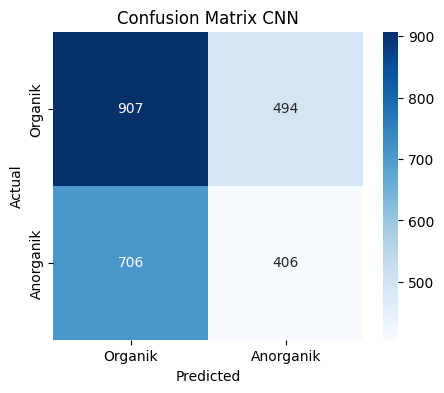

In [20]:
y_true = test_generator.classes
import numpy as np

y_prob = model.predict(test_generator)
y_pred = (y_prob > 0.5).astype(int).ravel()

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=["Organik", "Anorganik"]))


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Organik", "Anorganik"],
    yticklabels=["Organik", "Anorganik"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix CNN")
plt.show()


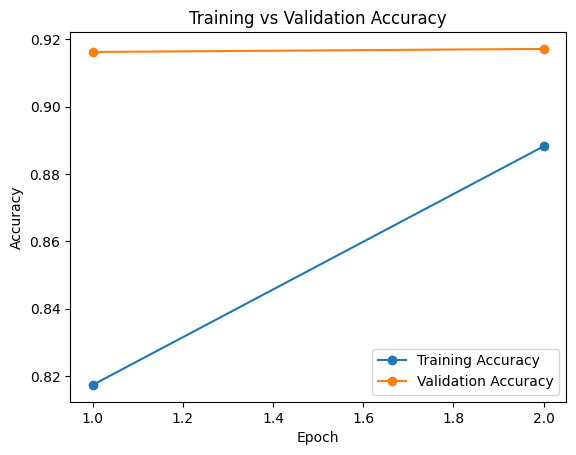

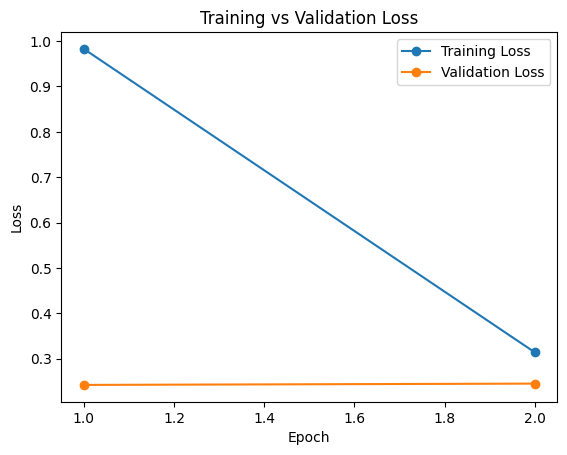

In [1]:
import matplotlib.pyplot as plt

# Data hasil log (manual)
epochs = [1, 2]

train_accuracy = [0.8174, 0.8882]
val_accuracy   = [0.9162, 0.9171]

train_loss = [0.9827, 0.3139]
val_loss   = [0.2420, 0.2449]

# Plot Accuracy
plt.figure()
plt.plot(epochs, train_accuracy, marker='o', label='Training Accuracy')
plt.plot(epochs, val_accuracy, marker='o', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.figure()
plt.plot(epochs, train_loss, marker='o', label='Training Loss')
plt.plot(epochs, val_loss, marker='o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [27]:
def predict_cnn(img_path, model):
    img = image.load_img(img_path, target_size=(150,150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    pred = model.predict(img_array, verbose=0)[0][0]
    label = 1 if pred > 0.5 else 0  # 1=Anorganik, 0=Organik
    return label


In [28]:
def evaluate_folder(folder_path, true_label, model, nb_pipeline):
    cnn_correct = 0
    nb_correct = 0
    total = 0

    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)

        # CNN
        cnn_pred = predict_cnn(img_path, model)

        # Naive Bayes
        nb_label, _ = predict_single_image(img_path, nb_pipeline)
        nb_pred = 0 if nb_label == "Organik" else 1

        if cnn_pred == true_label:
            cnn_correct += 1
        if nb_pred == true_label:
            nb_correct += 1

        total += 1

    return cnn_correct / total, nb_correct / total


In [29]:
folder_organik = r"C:\Users\Jerome\DataScience\AOL_AI\archive\DATASET\TEST\test organik"
folder_anorganik = r"C:\Users\Jerome\DataScience\AOL_AI\archive\DATASET\TEST\test anorganik"

cnn_org, nb_org = evaluate_folder(folder_organik, 0, model, nb_pipeline)
cnn_anorg, nb_anorg = evaluate_folder(folder_anorganik, 1, model, nb_pipeline)


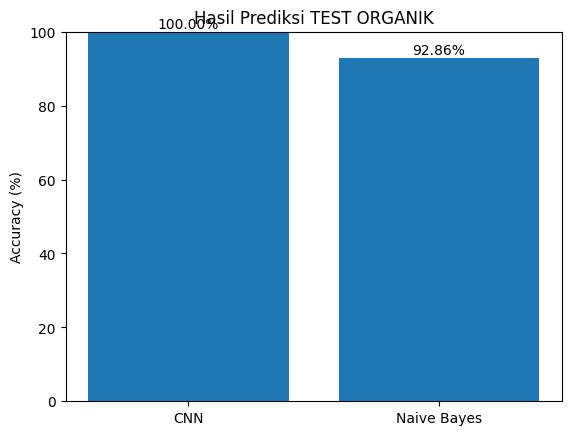

In [30]:
models = ["CNN", "Naive Bayes"]
values = [cnn_org * 100, nb_org * 100]

plt.figure()
plt.bar(models, values)
plt.ylabel("Accuracy (%)")
plt.title("Hasil Prediksi TEST ORGANIK")
plt.ylim(0,100)

for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')

plt.show()


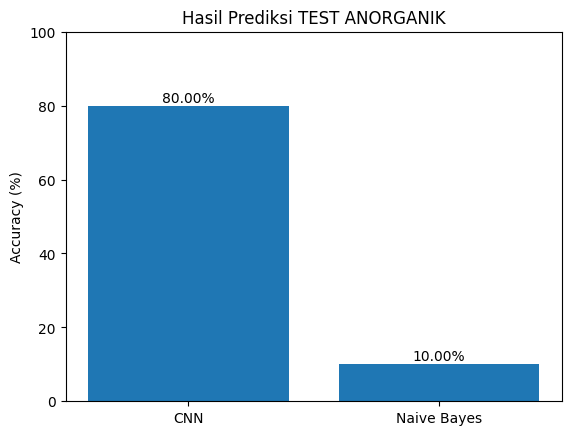

In [31]:
models = ["CNN", "Naive Bayes"]
values = [cnn_anorg * 100, nb_anorg * 100]

plt.figure()
plt.bar(models, values)
plt.ylabel("Accuracy (%)")
plt.title("Hasil Prediksi TEST ANORGANIK")
plt.ylim(0,100)

for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')

plt.show()


In [ ]:
img_path = r'C:\Users\Jerome\DataScience\AOL_AI\archive\DATASET\TEST\test11.webp'

img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

pred = model.predict(img_array)[0][0]
confidence_anorganik = pred * 100
confidence_organik = (1 - pred) * 100

if pred > 0.5:
    label = "Anorganik"
else:
    label = "Organik"

print("Hasil CNN")
print(f"Hasil Prediksi: {label}")
print(f"Organik    : {confidence_organik:.2f}%")
print(f"Anorganik  : {confidence_anorganik:.2f}%")


nb_label, nb_prob = predict_single_image(img_path, nb_pipeline)
print("\n")
print("Hasil Naive Bayes")
print("Prediksi:", nb_label)
print("Probabilitas [Organik, Anorganik]:", nb_prob)

plt.imshow(img)
plt.axis("off")
if pred > 0.5:
    cnn_text = f"CNN: {label} ({confidence_anorganik:.2f}%)\n"
else:
    cnn_text = f"CNN: {label} ({confidence_organik:.2f}%)\n"

bayes_text = f"Bayes: {nb_label} ({max(nb_prob)*100:.2f}%)"

plt.title(cnn_text + bayes_text)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Hasil CNN
Hasil Prediksi: Organik
Organik    : 99.99%
Anorganik  : 0.01%


Hasil Naive Bayes
Prediksi: Organik
Probabilitas [Organik, Anorganik]: [9.99995791e-01 4.20948552e-06]


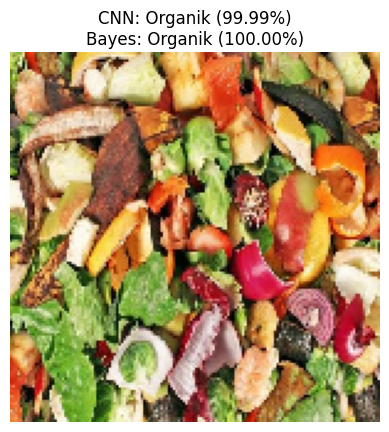

In [24]:
img_path = r'C:\Users\Jerome\DataScience\AOL_AI\archive\DATASET\TEST\test20.jpg'

img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

pred = model.predict(img_array)[0][0]
confidence_anorganik = pred * 100
confidence_organik = (1 - pred) * 100

if pred > 0.5:
    label = "Anorganik"
else:
    label = "Organik"

print("Hasil CNN")
print(f"Hasil Prediksi: {label}")
print(f"Organik    : {confidence_organik:.2f}%")
print(f"Anorganik  : {confidence_anorganik:.2f}%")


nb_label, nb_prob = predict_single_image(img_path, nb_pipeline)
print("\n")
print("Hasil Naive Bayes")
print("Prediksi:", nb_label)
print("Probabilitas [Organik, Anorganik]:", nb_prob)

plt.imshow(img)
plt.axis("off")
if pred > 0.5:
    cnn_text = f"CNN: {label} ({confidence_anorganik:.2f}%)\n"
else:
    cnn_text = f"CNN: {label} ({confidence_organik:.2f}%)\n"

bayes_text = f"Bayes: {nb_label} ({max(nb_prob)*100:.2f}%)"

plt.title(cnn_text + bayes_text)

plt.show()